# Hierarchical clustering

In [24]:
# Importing the necessary libraries

%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter
import random as pyrandom
from scipy.spatial.distance import cdist
figsize(6,6)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['median', 'fft', 'power', 'linalg', 'average', 'single', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [25]:
#Defining a method to plot the clusters
ccolors = ['go', 'ro','bo','mo','co','yo']
def plotclusters(data,centers=None):
    xlim([0,100]); ylim([0,100])
    if centers is None:
        plot(data[:,0],data[:,1],'bo',markersize=5)
    else:
        for i in range(amax(centers)+1):
            plot(data[centers==i,0],data[centers==i,1],ccolors[i%len(ccolors)],markersize=5)

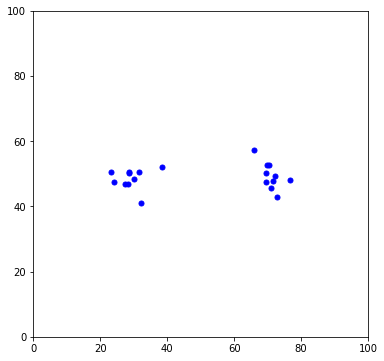

In [26]:
# A Simple Clustering Problem
data = r_[4*randn(10,2)+array([70,50]),
          4*randn(10,2)+array([30,50])]
# shuffle(data)
plotclusters(data)

In [27]:
# Compute distance between each pair of the two collections of inputs i.e., calculate distance between all the points in data
from scipy.spatial.distance import cdist
ds = cdist(data,data)

In [28]:
ds

array([[ 0.        , 11.10754255,  5.04823321,  3.39155338,  5.18129936,
         1.73221067,  2.22348671,  2.24056073,  5.41806719,  4.82591038,
        43.02416873, 43.0836878 , 47.42152148, 33.44512929, 39.9078238 ,
        48.30659566, 44.15555163, 40.0134811 , 43.36533619, 41.42856206],
       [11.10754255,  0.        , 13.93922626,  7.78105167,  6.38183049,
        10.20967523, 10.47114577, 12.78565684,  5.83892795, 15.83631802,
        38.07157243, 38.05956445, 42.99502168, 28.05992726, 37.46102724,
        43.19343331, 39.93646545, 34.97971359, 39.18883411, 36.95105926],
       [ 5.04823321, 13.93922626,  0.        ,  7.46864078,  7.59923993,
         4.41415693,  7.27105154,  6.22250541,  8.26171077,  6.3412139 ,
        48.0114833 , 48.06596617, 52.44557152, 38.36616324, 44.94884764,
        53.29172694, 49.18461717, 44.98809427, 48.39514516, 46.44208023],
       [ 3.39155338,  7.78105167,  7.46864078,  0.        ,  2.67012409,
         3.0659811 ,  2.92294394,  5.03299744,  

In [29]:
from scipy.cluster.hierarchy import *
lm = linkage(ds,"single")
lm

<ipython-input-29-bb8d7851ac23>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  lm = linkage(ds,"single")


array([[ 10.        ,  11.        ,   0.71339096,   2.        ],
       [  4.        ,   8.        ,   2.93549821,   2.        ],
       [ 16.        ,  18.        ,   3.14877248,   2.        ],
       [  0.        ,   5.        ,   4.67154529,   2.        ],
       [  7.        ,  23.        ,   5.95223081,   3.        ],
       [ 12.        ,  15.        ,   6.541968  ,   2.        ],
       [  3.        ,  21.        ,   6.67958686,   3.        ],
       [ 19.        ,  20.        ,   7.04893492,   3.        ],
       [ 22.        ,  27.        ,   7.44453465,   5.        ],
       [  6.        ,  26.        ,   7.45157251,   4.        ],
       [ 24.        ,  29.        ,   8.09986718,   7.        ],
       [ 17.        ,  28.        ,   8.18526359,   6.        ],
       [  9.        ,  30.        ,  11.0912859 ,   8.        ],
       [ 25.        ,  31.        ,  13.39669821,   8.        ],
       [  2.        ,  32.        ,  14.86604917,   9.        ],
       [ 14.        ,  33

In [30]:
lm.shape

(19, 4)

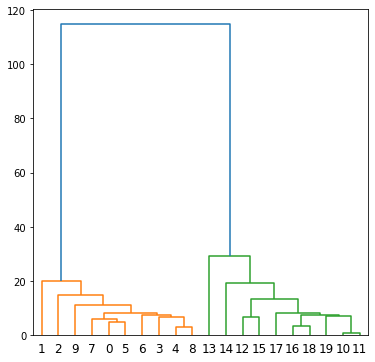

In [31]:
_=dendrogram(lm)

In [32]:
fcluster(lm,2,criterion='maxclust')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

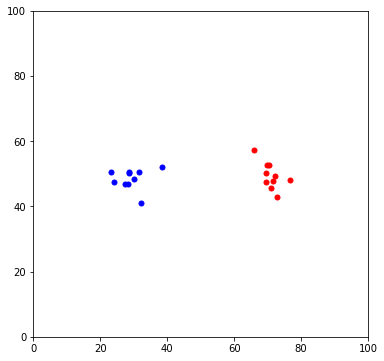

In [33]:
## Plotting the individual clusters
plotclusters(data,fcluster(lm,2,criterion='maxclust'))

In [34]:
# Taking a data for example
data = r_[dot(randn(100,2),diag([4,10]))+array([60,60]),
           dot(randn(100,2),diag([4,10]))+array([40,40])]
shuffle(data)

Since clusters are sets of points, there are many different kinds of linkage methods:

- Single Linkage: cluster distance = smallest pairwise distance
- Complete Linkage: cluster distance = largest pairwise distance
- Average Linkage: cluster distance = average pairwise distance
- Centroid Linkage: cluster distance=  distance between the centroids of the clusters
- Ward’s Linkage: cluster criteria= Minimize the variance in the cluster


#### Single Linkage

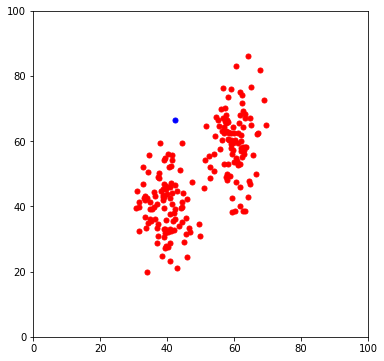

In [35]:
assignment = fclusterdata(data,2,metric='euclidean',method='single',criterion='maxclust') # 2 means 2 clusters
plotclusters(data,assignment)

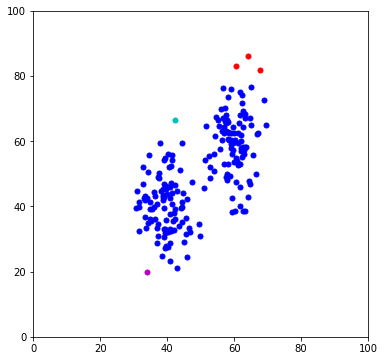

In [36]:
assignment = fclusterdata(data,4,metric='euclidean',method='single',criterion='maxclust')
plotclusters(data,assignment)

#### Complete Linkage

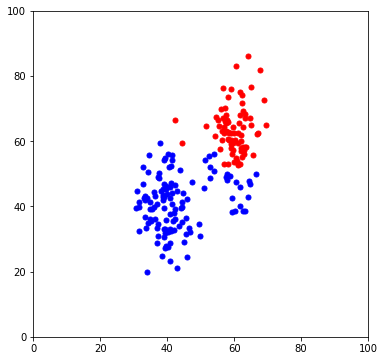

In [37]:
assignment = fclusterdata(data,2,metric='euclidean',method='complete',criterion='maxclust')
plotclusters(data,assignment)

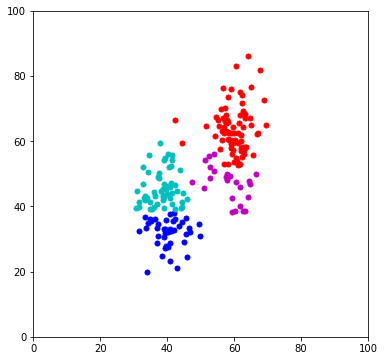

In [38]:
assignment = fclusterdata(data,4,metric='euclidean',method='complete',criterion='maxclust')
plotclusters(data,assignment)

#### Average Linkage

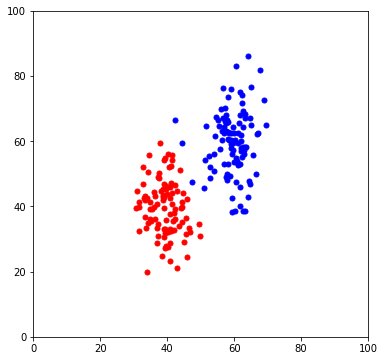

In [39]:
assignment = fclusterdata(data,2,metric='euclidean',method='average',criterion='maxclust')
plotclusters(data,assignment)

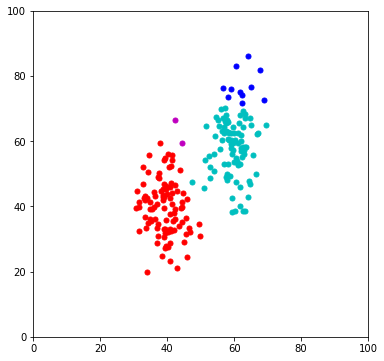

In [40]:
assignment = fclusterdata(data,4,metric='euclidean',method='average',criterion='maxclust')
plotclusters(data,assignment)

#### Centroid Linkage

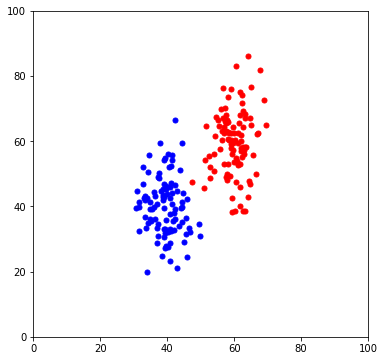

In [41]:
lm = linkage(data,metric='euclidean',method='centroid')
assignment = fcluster(lm,2,criterion='maxclust')
plotclusters(data,assignment)

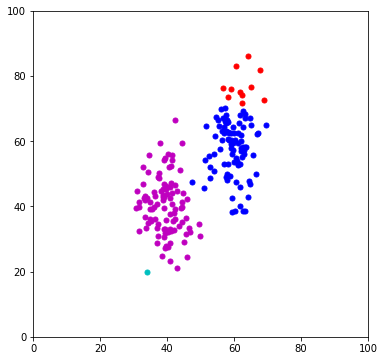

In [42]:
lm = linkage(data,metric='euclidean',method='centroid')
assignment = fcluster(lm,4,criterion='maxclust')
plotclusters(data,assignment)

#### Ward linkage

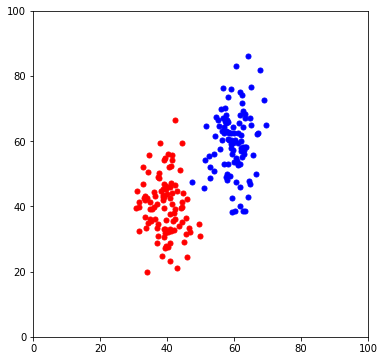

In [45]:
lm = linkage(data,metric='euclidean',method='ward')
assignment = fcluster(lm,2,criterion='maxclust')
plotclusters(data,assignment)

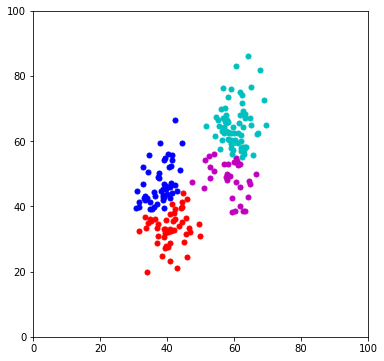

In [46]:
lm = linkage(data,metric='euclidean',method='ward')
assignment = fcluster(lm,4,criterion='maxclust')
plotclusters(data,assignment)